In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten, Dropout

2024-06-02 19:56:31.492647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_image(i):
    plt.imshow(x_train[i], cmap ='binary')
    plt.title(y_train[i])
    plt.show

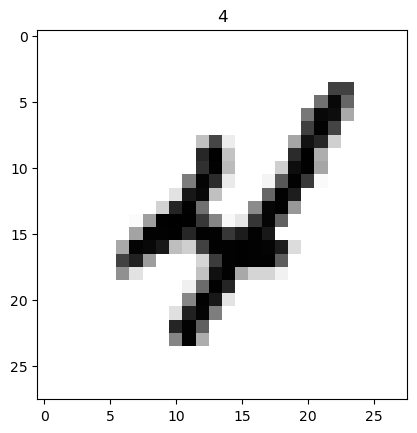

In [4]:
for i in range(10):
    plot_input_image(i)

In [5]:
#preprocessing the image

#normalizing
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#reshaping the image for ease of calculation (expanding the dimensions to (28,28,1))

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#converting y to as one_hot vector since it ranges from 0 to 9
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
#building the model
model = Sequential()

 #first convolutional layer added 3,3 kernel size is an industry standard the activation function may be changed
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

 #adding more convolutional layers but removing the input shape since it should only be provided in the input layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

 #this is for the classification part
model.add(Dense(10, activation = 'sigmoid'))

2024-06-02 19:56:42.738102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
filters, biases = model.layers[0].get_weights()


In [9]:
for i in range(32):
    filter_i = filters[:, :, 0, i]
    print(f"Filter {i} coefficients:\n{filter_i}")


Filter 0 coefficients:
[[ 0.02836028 -0.0264978  -0.0009886 ]
 [-0.09670553  0.0621095  -0.05746588]
 [-0.06709731 -0.01969922  0.06269751]]
Filter 1 coefficients:
[[ 0.1311978  -0.05766995 -0.02584008]
 [ 0.04826683  0.04040422  0.10744345]
 [ 0.1197051   0.10779485  0.08437583]]
Filter 2 coefficients:
[[ 1.4023732e-01 -1.0324575e-01  8.3571270e-02]
 [-3.8444407e-02  1.2348592e-04 -4.4108480e-02]
 [ 2.8295830e-02 -1.8810898e-02 -2.0726956e-02]]
Filter 3 coefficients:
[[ 0.0217021  -0.13002376  0.05092204]
 [ 0.05063426 -0.07464511  0.1378778 ]
 [ 0.06462632 -0.01962077 -0.03609172]]
Filter 4 coefficients:
[[-0.14114563  0.02389272  0.09849197]
 [-0.12789713  0.10317992  0.07572652]
 [-0.06467084  0.00405034  0.00752075]]
Filter 5 coefficients:
[[-0.01209673  0.13206626  0.01136175]
 [ 0.11849211  0.11160477  0.0542943 ]
 [ 0.08239707  0.04688826 -0.12263745]]
Filter 6 coefficients:
[[ 0.11218728  0.10536547 -0.09420021]
 [ 0.03926906  0.02348949  0.14125867]
 [ 0.08823353  0.00988039 

In [10]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Define callbacks
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint("./best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

# List of callbacks
callbacks = [es, mc]

# Check if the best_model.h5 file was created
#if os.path.exists("./best_model.h5"):
#    print("The best_model.h5 file was successfully created.")
#else:
#    print("Error: The best_model.h5 file was not created.")


In [12]:
# Training the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3, callbacks=callbacks)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9358
Epoch 1: val_accuracy improved from -inf to 0.97367, saving model to ./best_model.h5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.2150 - accuracy: 0.9358 - val_loss: 0.0850 - val_accuracy: 0.9737
Epoch 2/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9759
Epoch 2: val_accuracy improved from 0.97367 to 0.97911, saving model to ./best_model.h5
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0766 - accuracy: 0.9759 - val_loss: 0.0666 - val_accuracy: 0.9791
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9824
Epoch 3: val_accuracy improved from 0.97911 to 0.98528, saving model to ./best_model.h5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0520 - val_accuracy: 0.9853
Epoch 4/5
1312/1313 [======================

In [13]:
model_S = keras.models.load_model("/Users/damdam/best_model.h5")

In [14]:
score = model_S.evaluate(x_test, y_test)
print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0333 - accuracy: 0.9888
the model accuracy is 0.9887999892234802


In [15]:
# Assuming x_test is your test dataset and y_test are the corresponding labels

# Print the shape of the dataset (number of images, height, width, channels)
print(f"x_test shape: {x_test.shape}")

# Print the data type of the dataset
print(f"Data type: {x_test.dtype}")

# Print the range of pixel values
print(f"Pixel value range: {x_test.min()} to {x_test.max()}")

# If the data is normalized, state that
if x_test.max() == 1:
    print("The pixel values are normalized between 0 and 1.")

# If the images are in grayscale, they will have only one channel
if x_test.shape[-1] == 1:
    print("The images are in grayscale.")

# Print the distribution of the labels
unique, counts = np.unique(y_test, return_counts=True)
print(f"Label distribution: {dict(zip(unique, counts))}")

# Additionally, if you want to see more details like mean and standard deviation
print(f"Pixel mean value: {x_test.mean()}")
print(f"Pixel standard deviation: {x_test.std()}")


x_test shape: (10000, 28, 28, 1)
Data type: float32
Pixel value range: 0.0 to 1.0
The pixel values are normalized between 0 and 1.
The images are in grayscale.
Label distribution: {0.0: 90000, 1.0: 10000}
Pixel mean value: 0.13251467049121857
Pixel standard deviation: 0.3104802668094635


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Assuming `model` is your Keras Sequential model

# Print the model summary for a quick overview
model.summary()

# Iterate over each layer to print detailed information
for layer in model.layers:
    print("\n========================================================")
    print(f"Layer Name: {layer.name}")
    print(f"Layer Type: {type(layer).__name__}")
    print(f"Output Shape: {layer.output_shape}")
    if hasattr(layer, 'input_shape'):
        print(f"Input Shape: {layer.input_shape}")
    if hasattr(layer, 'kernel_size'):
        print(f"Kernel Size: {layer.kernel_size}")
    if hasattr(layer, 'strides'):
        print(f"Strides: {layer.strides}")
    if hasattr(layer, 'pool_size'):  # For pooling layers
        print(f"Pool Size: {layer.pool_size}")
    if hasattr(layer, 'rate'):  # For dropout layers
        print(f"Dropout Rate: {layer.rate}")
    if isinstance(layer, Dense):
        print(f"Number of Neurons: {layer.units}")
    if hasattr(layer, 'filters'):
        print(f"Number of Filters: {layer.filters}")
    
    # Print weights and biases
    if layer.get_weights():
        weights = layer.get_weights()[0]  # Weights
        biases = layer.get_weights()[1]  # Biases
        print(f"Weights Shape: {weights.shape}")
        print(f"Biases Shape: {biases.shape}")
        # Uncomment the following lines if you want to print the actual values
        #print("Weights:", weights)
        #print("Biases:", biases)
    print("========================================================\n")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model("./best_model.h5")

# Get weights of the model
weights = model.get_weights()

# Print weights
# Note: This can result in a very large output if the model is complex
for i, weight in enumerate(weights):
    print(f"Layer {i} weights:\n{weight}\n")

# If you prefer to save the weights to a file
with open('model_weights.txt', 'w') as f:
    for i, weight in enumerate(weights):
        f.write(f"Layer {i} weights:\n{weight}\n\n")


Layer 0 weights:
[[[[-1.95070937e-01  1.71990663e-01  3.41304034e-01  6.08410016e-02
    -3.62101197e-01 -1.21435568e-01  1.08001254e-01 -4.92951572e-01
     1.60097033e-01  1.18975058e-01 -2.06471652e-01  1.54403105e-01
     1.06243096e-01 -1.41423315e-01  2.02369153e-01  1.91001534e-01
    -3.95409763e-01 -7.74291083e-02  7.75996223e-02  3.87755595e-03
    -3.33385989e-02 -3.26927640e-02 -2.74402022e-01  1.82822526e-01
    -1.82900280e-02 -3.06729168e-01  5.74964024e-02  2.40712777e-01
    -1.92554474e-01 -1.94939077e-01  1.24538727e-01  1.16250776e-01]]

  [[-1.51675493e-01 -5.36559746e-02  1.60708025e-01 -1.75658733e-01
     9.87874195e-02  1.45655513e-01  8.61228257e-02 -3.27467233e-01
     4.67665121e-02  1.75872043e-01 -1.62528530e-01  1.73936620e-01
     6.71929643e-02  9.87177417e-02  2.72918880e-01  6.85869008e-02
    -5.03449142e-01 -3.00584733e-01  3.38873751e-02  1.23152092e-01
     2.54012702e-04  3.63709591e-02 -5.47194600e-01  2.50394970e-01
    -2.31212750e-01 -2.03127

In [18]:
import json

# Assuming `model` is your trained Keras model

def extract_weights_and_biases(model):
    layers_data = []
    for layer in model.layers:
        # Initialize a dictionary to store layer data
        layer_data = {
            "name": layer.name,
            "type": type(layer).__name__
        }
        # Check if the layer has weights
        if layer.get_weights():
            weights = layer.get_weights()[0]  # Weights
            biases = layer.get_weights()[1]  # Biases
            # Convert numpy arrays to list for JSON serialization
            layer_data["weights"] = weights.tolist()
            layer_data["biases"] = biases.tolist()
        
        layers_data.append(layer_data)
    
    return layers_data

# Extract weights and biases
weights_and_biases = extract_weights_and_biases(model)

# Define the file path (modify this path as necessary)
file_path = 'cnnNeuroYONGAweight.json'

# Write the extracted weights and biases to a JSON file
with open(file_path, 'w') as f:
    json.dump(weights_and_biases, f)

print(f"Weights and biases were successfully saved to {file_path}")


Weights and biases were successfully saved to cnnNeuroYONGAweight.json
